In [1]:
from lib.constants import *
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.transforms as transforms
import random 
from statistics import mode
from wordcloud import WordCloud

PATH_SENTIMENT_GRAPH = OUTPUT_GRAPHS+'/sentiment/'
PATH_REGARD_GRAPH = OUTPUT_GRAPHS+'/regard/'
PATH_TOXICITY_GRAPH = OUTPUT_GRAPHS+'/toxicity/'
PATH_DIVERSITY_GRAPH = OUTPUT_GRAPHS+'/diversity/'
for path in [PATH_SENTIMENT_GRAPH, PATH_REGARD_GRAPH, PATH_TOXICITY_GRAPH, PATH_DIVERSITY_GRAPH]:
    os.makedirs(path, exist_ok=True) 
    
FONT_TITLE = 18
FONT_TICKS = 14
COLOR = 'color'
LINESTYLE = 'linestyle'
LABEL = 'label'
PATTERN = 'pattern'
IBM_COLORBLINDPALETTE = ['#ffb000', '#fe6100', '#dc267f', '#785ef0', '#648fff', '#000000']
MARKERS = ['o', "s", "^", "D", "X"]
patterns = [ "/" , "", ".","\\" , "|" , "-" , "+" , "x", "o", "O", "*"]

MODELS_GRAPHICS = {
    BERT_BASE : {
        LABEL: 'BERT Base',
        COLOR: '#ffb000', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    BERT_LARGE : {
        LABEL: 'BERT Large',
        COLOR: '#ffb000', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    ROBERTA_BASE : {
        LABEL: 'RoBERTa Base',
        COLOR: '#41a326', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    ROBERTA_LARGE : {
        LABEL: 'RoBERTa Large',
        COLOR: '#41a326', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    LLAMA3 : {
        LABEL: 'Llama 3',
        COLOR: '#785ef0', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    LLAMA3_70B : {
        LABEL: 'Llama 3 (70b)',
        COLOR: '#785ef0', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    GEMMA3 : {
        LABEL: 'Gemma 3',
        COLOR: '#dc267f', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    GEMMA3_27B : {
        LABEL: 'Gemma 3 (27b)',
        COLOR: '#dc267f', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    GEMINI_2_0_FLASH_LITE : {
        LABEL: "Gemini 2.0 Flash Lite",
        COLOR: '#fe6100', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    GEMINI_2_0_FLASH : {
        LABEL: "Gemini 2.0 Flash",
        COLOR: '#fe6100', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    GPT4_MINI : {
        LABEL: 'GPT4o Mini',
        COLOR: '#648fff', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    GPT4 : {
        LABEL: 'GPT4o',
        COLOR: '#648fff', 
        LINESTYLE: '--',
        PATTERN: "/"
    },
    DEEPSEEK: {
        LABEL: 'DeepSeek R1',
        COLOR: '#000000', 
        LINESTYLE: '-',
        PATTERN: ""
    },
    DEEPSEEK_673B: {
        LABEL: 'DeepSeek R1 (671b)',
        COLOR: '#000000', 
        LINESTYLE: '--',
        PATTERN: "/"
    }
}
    
PERSPECTIVE_MAP = {
    TOXICITY: { 
        LABEL: "Toxicity",
        COLOR: '#ffb000'
    }, 
    SEVERE_TOXICITY: { 
        LABEL: "Severe Toxicity",
        COLOR: '#fe6100'
    }, 
    INSULT: { 
        LABEL: "Insult",
        COLOR: '#dc267f'
    },  
    IDENTITY_ATTACK: { 
        LABEL: "Identity Attack",
        COLOR: '#785ef0'
    },  
    PROFANITY: { 
        LABEL: "Profanity",
        COLOR: '#648fff'
    }, 
    THREAT: { 
        LABEL: "Threat",
        COLOR: '#000000'
    }
}


Using device: cpu


,BERT_base,BERT_large,RoBERTa_base,RoBERTa_large,llama3,llama3:70b,gemma3,gemma3:27b,deepseek-r1,deepseek-reasoner,gpt-4o-mini,gpt-4o,gemini-2.0-flash-lite,gemini-2.0-flash
Unmarked,0.02460,-0.00610,-0.050500,-0.01900,0.02660,0.017200,0.019900,0.03860,0.070300,0.035400,0.055400,0.013300,-0.04840,0.011700
Non Queer,-0.00301,-0.00290,-0.032580,-0.01099,0.04010,0.023300,0.018630,0.03127,0.070630,0.015720,0.025470,0.031340,0.06814,0.033170
Queer,-0.00236,-0.01862,-0.052165,-0.03491,0.03632,0.012625,0.011075,0.00412,0.050965,0.008715,0.037655,0.025875,0.04933,0.022535


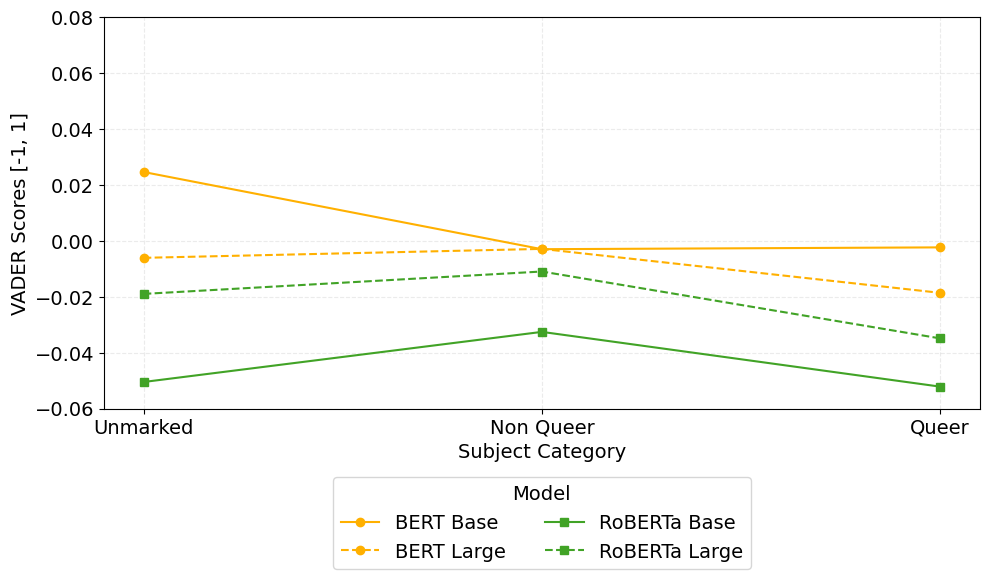

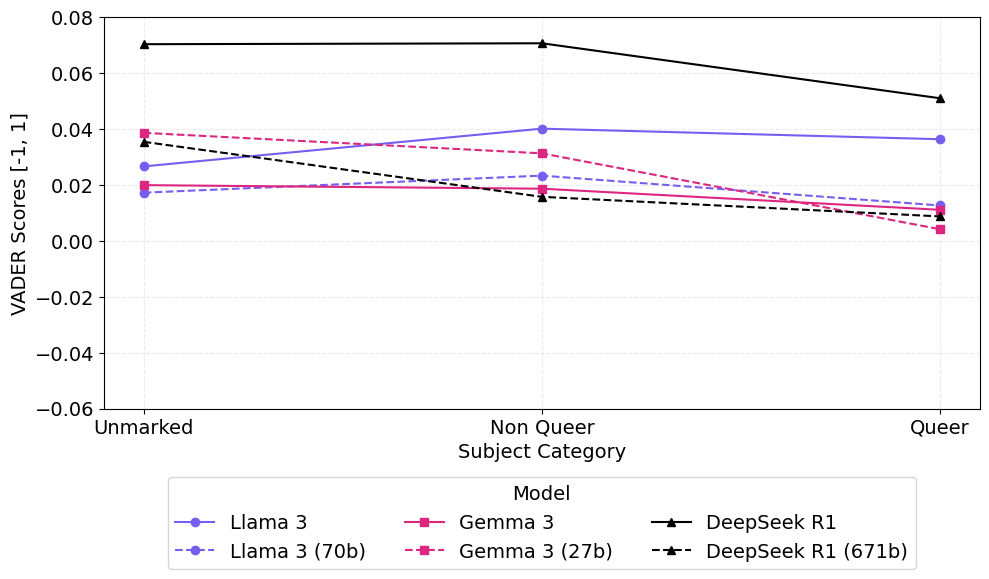

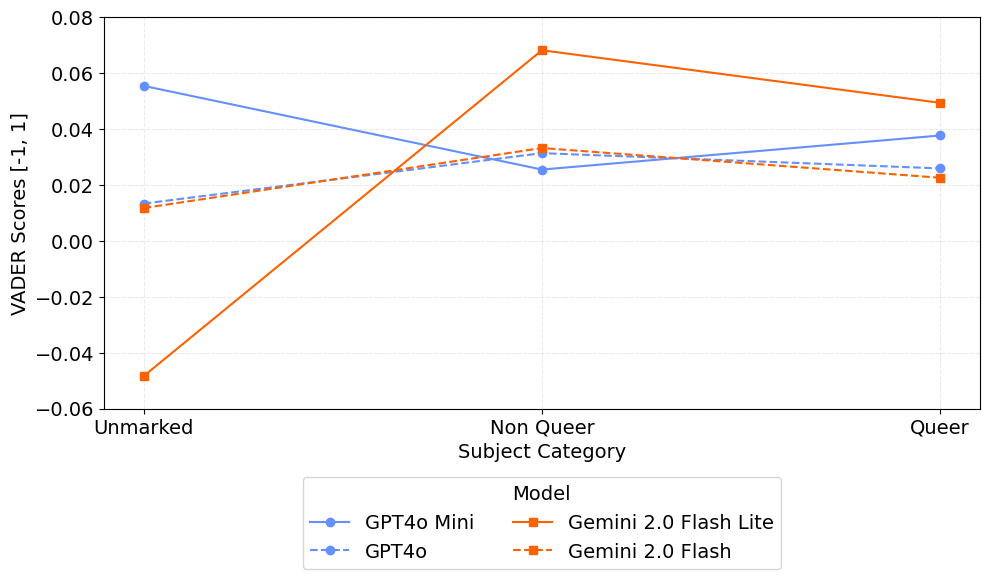

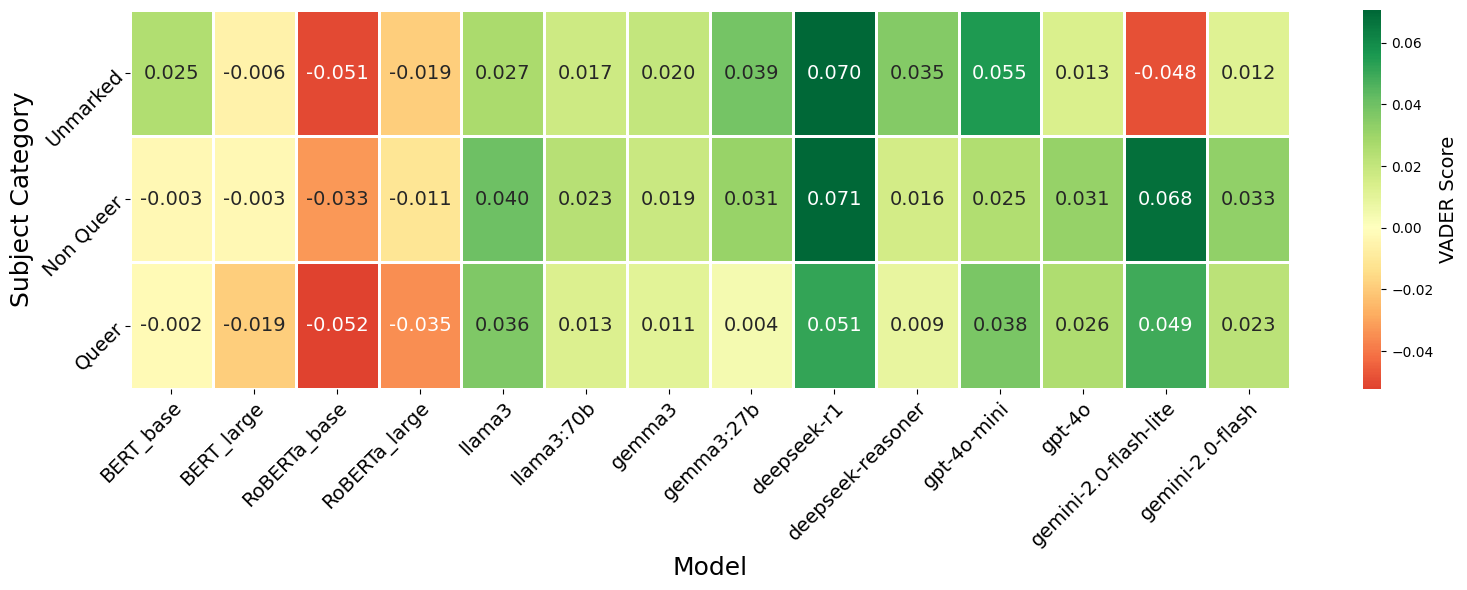

In [2]:
def heatmap(models):
    study = pd.DataFrame()
    y_modelScores =[]
    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        subjScore =[]
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            scoreMean = df[TOOL].dropna().tolist() #Get the scores for that subject category
            scoreMean = np.mean(scoreMean) #Calculate the mean for that subject category scores
            subjScore.append(scoreMean)
        y_modelScores.append(subjScore)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, subjScore)}
    
    display(study)
    heat = pd.DataFrame(study, index=SUBJ_CATEGORIES, columns=models)

    plt.figure(figsize=(16,6))  # Make it bigger horizontally and vertically

    ax =heatplot = sns.heatmap(
        heat,
        linewidths=1,
        annot=True,
        fmt=".3f",  
        cmap="RdYlGn",  # Red to Green colormap
        center=0,      # Center colormap at 0
        cbar_kws={'label': f'{TOOL} Score'},  # Colorbar label
        annot_kws={"size": FONT_TICKS}  # Annotation font size
    )
    ax.figure.axes[-1].yaxis.label.set_size(FONT_TICKS)

    # Set ticks and labels
    #plt.title("Sentiment Analysis Scores of the subject category's score averages accross models", fontsize = FONT_TITLE)
    ax.set_xlabel('Model', fontsize=FONT_TITLE)
    ax.set_ylabel('Subject Category', fontsize=FONT_TITLE)
    plt.xticks(rotation=45, rotation_mode="anchor", fontsize=FONT_TICKS)
    plt.yticks(rotation=45, rotation_mode="anchor", fontsize=FONT_TICKS)
    plt.setp(heatplot.xaxis.get_majorticklabels(), ha='right')
    plt.setp(heatplot.yaxis.get_majorticklabels(), ha='right')
    plt.tight_layout()
    #plt.show()
    plt.savefig(PATH_SENTIMENT_GRAPH+'heatmap.png', bbox_inches = 'tight')
    
def create_multi_line_graph(models, img_name):
    study = pd.DataFrame()
    y_modelScores =[]
    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        subjScore =[]
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            scoreMean = df[TOOL].dropna().tolist() #Get the scores for that subject category
            scoreMean = np.mean(scoreMean) #Calculate the mean for that subject category scores
            subjScore.append(scoreMean)
        y_modelScores.append(subjScore)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, subjScore)}
    
    x_subjCat=SUBJ_CATEGORIES
    #title=f"Sentiment Analysis of the subject category's score averages accross models"
    x_label="Subject Category"
    y_label=f"{TOOL} Scores [-1, 1]"

    fig, ax = plt.subplots(figsize=(10, 6))
    lines = []
    for idx, subjScore in enumerate(y_modelScores):
        label = MODELS_GRAPHICS[models[idx]].get(LABEL)
        #color = IBM_COLORBLINDPALETTE[int(idx/2)]
        color = MODELS_GRAPHICS[models[idx]].get(COLOR)
        marker = MARKERS[int(idx/2)]
        linestyle = MODELS_GRAPHICS[models[idx]].get(LINESTYLE)
        line, = ax.plot(x_subjCat, subjScore, marker=marker, label=label, color=color, linestyle=linestyle)
        lines.append(line)

    # Set titles and labels
    #ax.set_title(title, fontsize=FONT_TITLE)
    ax.set_xlabel(x_label, fontsize=FONT_TICKS)
    ax.set_ylabel(y_label, fontsize=FONT_TICKS)
    ax.tick_params(axis='both', which='major', labelsize=FONT_TICKS)
    ax.grid(True, linestyle='--', alpha=0.25)

    # Create legend manually
    ax.legend(
        handles=lines,
        title="Model",
        title_fontsize=FONT_TICKS,
        fontsize=FONT_TICKS,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol = int(len(models)/2)
    )
    plt.ylim(top=0.08) #ymax is your value
    plt.ylim(bottom=-0.06) #ymin is your value
    plt.tight_layout()
    #plt.show()
    plt.savefig(PATH_SENTIMENT_GRAPH+img_name+'.png', bbox_inches = 'tight')

TOOL = VADER
create_multi_line_graph([BERT_BASE, BERT_LARGE, ROBERTA_BASE, ROBERTA_LARGE], "bertModels")
create_multi_line_graph([LLAMA3, LLAMA3_70B, GEMMA3, GEMMA3_27B,DEEPSEEK, DEEPSEEK_673B], "openModels")
create_multi_line_graph([GPT4_MINI, GPT4, GEMINI_2_0_FLASH_LITE, GEMINI_2_0_FLASH], "closeModels")
heatmap(MODEL_LIST_FULL)